# Extracting 4000 rows from the dataset

In [1]:
import pandas as pd


In [2]:
# Read the entire CSV file into a DataFrame
df = pd.read_csv('updated_dataset.csv')
df

,jobs,company_name,job_title,employment_type,seniority,job_category,Unnamed: 6,Unnamed: 7,skills_required,Unnamed: 9,...,no_of_applications,job_id,combined_text,Unnamed: 18,glove_combined_vector,numeric_experience,Unnamed: 21,salary,location,job_index
0,{'company_name': 'THE SUPREME HR ADVISORY PTE....,THE SUPREME HR ADVISORY PTE. LTD.,Admin Assistant,"Permanent, Full Time",Junior Executive,"['Admin ', ' Secretarial']",NaN,NaN,"['Access', 'Customer Service', 'Data Entry', '...",NaN,...,7,JOB-2019-0098255,Admin Assistant [$1.5k-$2.2k / Bukit Batuk ...,NaN,[-0.01471694 0.06596667 0.05989918 0.023779...,1,NaN,"$1,800to$2,200Monthly","AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015",0
1,{'company_name': 'GOOGLE ASIA PACIFIC PTE. LTD...,GOOGLE ASIA PACIFIC PTE. LTD.,Visual Designer,Full Time,Executive,['Design'],NaN,NaN,"['Adobe Creative Suite', 'Advertising', 'Art D...",NaN,...,43,JOB-2019-0098355,"Visual Designer, Google Pay - Singapore ['Desi...",NaN,[ 3.29660000e-02 2.35410100e-03 -6.49132505e-...,5,NaN,"$6,700to$13,400Monthly","MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",1
2,"{'company_name': 'BBDO SINGAPORE PTE LTD', 'jo...",BBDO SINGAPORE PTE LTD,IT Manager,"Permanent, Full Time","Manager, Professional",['Information Technology'],NaN,NaN,"['Active Directory', 'Business Analysis', 'Cha...",NaN,...,37,JOB-2019-0098419,IT Manager ['Information Technology'] 5 ['Acti...,NaN,[-1.76727500e-02 5.41049987e-03 2.10629243e-...,5,NaN,"$5,000to$7,000Monthly","SINGAPORE LAND TOWER, 50 RAFFLES PLACE 048623",2
3,{'company_name': 'AMARIS CONSULTING PTE. LTD.'...,AMARIS CONSULTING PTE. LTD.,Active Directory Consultant,"Permanent, Full Time",Non-executive,['Information Technology'],NaN,NaN,"['Analysis', 'Business Analysis', 'Business De...",NaN,...,0,JOB-2019-0097764,Active Directory Consultant ['Information Tech...,NaN,[-3.00102427e-02 3.53659472e-02 -4.80896201e-...,4,NaN,"$5,000to$7,000Monthly","ROBINSON 112, 112 ROBINSON ROAD 068902",3
4,{'company_name': 'HITACHI CONSULTING SINGAPORE...,HITACHI CONSULTING SINGAPORE PTE. LTD.,Senior Consultant,Permanent,Senior Executive,['Information Technology'],NaN,NaN,"['Analysis', 'Business Analysis', 'Business De...",NaN,...,3,JOB-2019-0098085,Senior Consultant (SAP HCM) ['Information Tech...,NaN,[-0.04147734 0.0018299 0.01541946 -0.040212...,8,NaN,"$6,000to$9,000Monthly","PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20291,{'company_name': 'THIRD AVENUE STUDIO PTE. LTD...,THIRD AVENUE STUDIO PTE. LTD.,Project Coordinator,Full Time,Non-executive,"['Architecture ', ' Interior Design']",NaN,NaN,"['Budgets', 'Customer Service', 'Event Managem...",NaN,...,5,JOB-2019-0115423,"Project Coordinator ['Architecture ', ' Interi...",NaN,[-4.83765857e-02 6.64146572e-04 3.84775375e-...,2,NaN,Salary undisclosed,67 KIM YAM ROAD 239367,1539
20292,{'company_name': 'HAYS SPECIALIST RECRUITMENT ...,HAYS SPECIALIST RECRUITMENT PTE. LTD.,IT Administrator,Contract,Professional,['Information Technology'],NaN,NaN,"['BGP', 'Cisco Technologies', 'Cloud Computing...",NaN,...,1,JOB-2019-0115386,IT Administrator ['Information Technology'] 7 ...,NaN,[-0.01274776 -0.00851676 0.05055618 -0.009954...,7,NaN,"$10,000to$12,000Monthly","UOB PLAZA, 80 RAFFLES PLACE 048624",1700
20293,"{'company_name': 'SHEFFIELD ENERGY PTE. LTD.',...",SHEFFIELD ENERGY PTE. LTD.,Piping Superintendent,Full Time,Manager,"['Environment ', ' Health, Others']",NaN,NaN,"['Budgets', 'Change Orders', 'Commissioning', ...",NaN,...,20,JOB-2019-0115278,"Piping Superintendent ['Environment ', ' Healt...",NaN,[-0.03405556 0.0084325 0.04058275 -0.061115...,6,NaN,"$9,000to$10,300Monthly","THE ARCADE, 11 COLLYER QUAY 049317",11267
20294,{'company_name': 'M.T.M. SHIP MANAGEMENT PTE L...,M.T.M. SHIP MANAGEMENT PTE LTD,SENIOR TECHNICAL SUPERINTENDENT,Permanent,Professional,['Others'],NaN,NaN,"['AV', 'Continuous Improvement', 'Customer Ser...",NaN,...,12,JOB-2019-0115031,SENIOR TEC

In [3]:
# Extract the first 10000 rows
first_10000_rows = df.head(4000)


In [4]:
# Save this extracted data to a new CSV file
first_10000_rows.to_csv('first_4000_rows.csv', index=False)

# Preprocessing

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

In [6]:
# Load CSV file
df = pd.read_csv('first_4000_rows.csv')
df

,jobs,company_name,job_title,employment_type,seniority,job_category,Unnamed: 6,Unnamed: 7,skills_required,Unnamed: 9,...,no_of_applications,job_id,combined_text,Unnamed: 18,glove_combined_vector,numeric_experience,Unnamed: 21,salary,location,job_index
0,{'company_name': 'THE SUPREME HR ADVISORY PTE....,THE SUPREME HR ADVISORY PTE. LTD.,Admin Assistant,"Permanent, Full Time",Junior Executive,"['Admin ', ' Secretarial']",NaN,NaN,"['Access', 'Customer Service', 'Data Entry', '...",NaN,...,7,JOB-2019-0098255,Admin Assistant [$1.5k-$2.2k / Bukit Batuk ...,NaN,[-0.01471694 0.06596667 0.05989918 0.023779...,1,NaN,"$1,800to$2,200Monthly","AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015",0
1,{'company_name': 'GOOGLE ASIA PACIFIC PTE. LTD...,GOOGLE ASIA PACIFIC PTE. LTD.,Visual Designer,Full Time,Executive,['Design'],NaN,NaN,"['Adobe Creative Suite', 'Advertising', 'Art D...",NaN,...,43,JOB-2019-0098355,"Visual Designer, Google Pay - Singapore ['Desi...",NaN,[ 3.29660000e-02 2.35410100e-03 -6.49132505e-...,5,NaN,"$6,700to$13,400Monthly","MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",1
2,"{'company_name': 'BBDO SINGAPORE PTE LTD', 'jo...",BBDO SINGAPORE PTE LTD,IT Manager,"Permanent, Full Time","Manager, Professional",['Information Technology'],NaN,NaN,"['Active Directory', 'Business Analysis', 'Cha...",NaN,...,37,JOB-2019-0098419,IT Manager ['Information Technology'] 5 ['Acti...,NaN,[-1.76727500e-02 5.41049987e-03 2.10629243e-...,5,NaN,"$5,000to$7,000Monthly","SINGAPORE LAND TOWER, 50 RAFFLES PLACE 048623",2
3,{'company_name': 'AMARIS CONSULTING PTE. LTD.'...,AMARIS CONSULTING PTE. LTD.,Active Directory Consultant,"Permanent, Full Time",Non-executive,['Information Technology'],NaN,NaN,"['Analysis', 'Business Analysis', 'Business De...",NaN,...,0,JOB-2019-0097764,Active Directory Consultant ['Information Tech...,NaN,[-3.00102427e-02 3.53659472e-02 -4.80896201e-...,4,NaN,"$5,000to$7,000Monthly","ROBINSON 112, 112 ROBINSON ROAD 068902",3
4,{'company_name': 'HITACHI CONSULTING SINGAPORE...,HITACHI CONSULTING SINGAPORE PTE. LTD.,Senior Consultant,Permanent,Senior Executive,['Information Technology'],NaN,NaN,"['Analysis', 'Business Analysis', 'Business De...",NaN,...,3,JOB-2019-0098085,Senior Consultant (SAP HCM) ['Information Tech...,NaN,[-0.04147734 0.0018299 0.01541946 -0.040212...,8,NaN,"$6,000to$9,000Monthly","PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"{'company_name': 'Health Promotion Board', 'jo...",Health Promotion Board,Assistant Director / Senior Manager / Manager,Permanent,Manager,"['Public ', ' Civil Service']",NaN,NaN,"['Analysis', 'Budgets', 'Business Analysis', '...",NaN,...,0,JOB-2019-0037644,Assistant Director / Senior Manager / Manager ...,NaN,[ 1.64149437e-02 -5.30930544e-02 1.60679663e-...,2,NaN,Salary undisclosed,3 SECOND HOSPITAL AVENUE 168937,2937
3996,{'company_name': 'TOKYU HANDS SINGAPORE PTE. L...,TOKYU HANDS SINGAPORE PTE. LTD.,Store Manager,"Permanent, Full Time","Senior Management, Middle Management, Manager","['Customer Service, General Management, Sales ...",NaN,NaN,"['Customer Satisfaction', 'Customer Service', ...",NaN,...,16,JOB-2019-0097627,"Store Manager ['Customer Service, General Mana...",NaN,[-5.52442011e-03 -4.08714181e-02 3.83294654e-...,5,NaN,Salary undisclosed,not_available,2938
3997,{'company_name': 'THE SUPREME HR ADVISORY PTE....,THE SUPREME HR ADVISORY PTE. LTD.,Designer,Full Time,Junior Executive,['Design'],NaN,NaN,"['Adobe Creative Suite', 'Advertising', 'Art D...",NaN,...,1,JOB-2019-0097161,Designer [Apparel / Clothing / Garment / Fash...,NaN,[ 0.03432732 0.04445048 -0.06195225 -0.039652...,3,NaN,"$2,000to$3,000Monthly","AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015",2939
3998,{'company_name': 'ADORE TECHNOLOGIES PTE. LTD....,ADORE TECHNOLOGIES PTE. LTD.,Executive - Sales & Marketing,Full Time,Executive,"['Advertising ', ' Media, Marketing ', ' Publi...",NaN,NaN,"['Account Management', 'B2B

In [7]:
df['job_description'] = df['requirements_and_role'] + ' ' + df['job_requirements'] 

In [8]:
df['job_description'][1]

"company overview google conventional company intend become one true share attributes world successful organizations focus innovation smart business practices comes mind even continue grow committed retaining small company feel google know every employee something important say every employee integral success provide individually tailored compensation packages comprised competitive salary bonus equity components along opportunity earn financial bonuses rewards googlers thrive small focused teams high energy environments believe ability technology change world passionate lives work information visit www google com careers area ux user experience forefront create intuitive innovative beautiful products people love strive learn understand users needs behaviors emotions gather insights inform product strategy design ux teams include designers researchers content strategists engineers passionate quality usability simplicity work collaborative teams solve complex challenges craft experiences

In [9]:
# Load stopwords
stop_words = set(stopwords.words('english'))

In [10]:
# Drop rows with missing values in 'requirements_and_role' column
df = df.dropna(subset=['job_description'])
df

,jobs,company_name,job_title,employment_type,seniority,job_category,Unnamed: 6,Unnamed: 7,skills_required,Unnamed: 9,...,job_id,combined_text,Unnamed: 18,glove_combined_vector,numeric_experience,Unnamed: 21,salary,location,job_index,job_description
0,{'company_name': 'THE SUPREME HR ADVISORY PTE....,THE SUPREME HR ADVISORY PTE. LTD.,Admin Assistant,"Permanent, Full Time",Junior Executive,"['Admin ', ' Secretarial']",NaN,NaN,"['Access', 'Customer Service', 'Data Entry', '...",NaN,...,JOB-2019-0098255,Admin Assistant [$1.5k-$2.2k / Bukit Batuk ...,NaN,[-0.01471694 0.06596667 0.05989918 0.023779...,1,NaN,"$1,800to$2,200Monthly","AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015",0,providing support director admin manager assis...
1,{'company_name': 'GOOGLE ASIA PACIFIC PTE. LTD...,GOOGLE ASIA PACIFIC PTE. LTD.,Visual Designer,Full Time,Executive,['Design'],NaN,NaN,"['Adobe Creative Suite', 'Advertising', 'Art D...",NaN,...,JOB-2019-0098355,"Visual Designer, Google Pay - Singapore ['Desi...",NaN,[ 3.29660000e-02 2.35410100e-03 -6.49132505e-...,5,NaN,"$6,700to$13,400Monthly","MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...",1,company overview google conventional company i...
2,"{'company_name': 'BBDO SINGAPORE PTE LTD', 'jo...",BBDO SINGAPORE PTE LTD,IT Manager,"Permanent, Full Time","Manager, Professional",['Information Technology'],NaN,NaN,"['Active Directory', 'Business Analysis', 'Cha...",NaN,...,JOB-2019-0098419,IT Manager ['Information Technology'] 5 ['Acti...,NaN,[-1.76727500e-02 5.41049987e-03 2.10629243e-...,5,NaN,"$5,000to$7,000Monthly","SINGAPORE LAND TOWER, 50 RAFFLES PLACE 048623",2,manager manager job involves vast array duties...
3,{'company_name': 'AMARIS CONSULTING PTE. LTD.'...,AMARIS CONSULTING PTE. LTD.,Active Directory Consultant,"Permanent, Full Time",Non-executive,['Information Technology'],NaN,NaN,"['Analysis', 'Business Analysis', 'Business De...",NaN,...,JOB-2019-0097764,Active Directory Consultant ['Information Tech...,NaN,[-3.00102427e-02 3.53659472e-02 -4.80896201e-...,4,NaN,"$5,000to$7,000Monthly","ROBINSON 112, 112 ROBINSON ROAD 068902",3,undertaking various active directory projects ...
4,{'company_name': 'HITACHI CONSULTING SINGAPORE...,HITACHI CONSULTING SINGAPORE PTE. LTD.,Senior Consultant,Permanent,Senior Executive,['Information Technology'],NaN,NaN,"['Analysis', 'Business Analysis', 'Business De...",NaN,...,JOB-2019-0098085,Senior Consultant (SAP HCM) ['Information Tech...,NaN,[-0.04147734 0.0018299 0.01541946 -0.040212...,8,NaN,"$6,000to$9,000Monthly","PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...",4,provide l2 support sap hcm related issues trou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,"{'company_name': 'Health Promotion Board', 'jo...",Health Promotion Board,Assistant Director / Senior Manager / Manager,Permanent,Manager,"['Public ', ' Civil Service']",NaN,NaN,"['Analysis', 'Budgets', 'Business Analysis', '...",NaN,...,JOB-2019-0037644,Assistant Director / Senior Manager / Manager ...,NaN,[ 1.64149437e-02 -5.30930544e-02 1.60679663e-...,2,NaN,Salary undisclosed,3 SECOND HOSPITAL AVENUE 168937,2937,physical activity weight management aim make p...
3996,{'company_name': 'TOKYU HANDS SINGAPORE PTE. L...,TOKYU HANDS SINGAPORE PTE. LTD.,Store Manager,"Permanent, Full Time","Senior Management, Middle Management, Manager","['Customer Service, General Management, Sales ...",NaN,NaN,"['Customer Satisfaction', 'Customer Service', ...",NaN,...,JOB-2019-0097627,"Store Manager ['Customer Service, General Mana...",NaN,[-5.52442011e-03 -4.08714181e-02 3.83294654e-...,5,NaN,Salary undisclosed,not_available,2938,store manager oversees end end operations stor...
3997,{'company_name': 'THE SUPREME HR ADVISORY PTE....,THE SUPREME HR ADVISORY PTE. LTD.,Designer,Full Time,Junior Executive,['Design'],NaN,NaN,"['Adobe Creative Suite', 'Advertising', 'Art D...",NaN,...,JOB-2019-0097161,Designer [Apparel / Clothing / Garment / Fash...,NaN,[ 0.03432732 0.04445048 

In [11]:
# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove less important strings
    text = text.replace('requirements', '')
    text = text.replace('available', '')
    return text

In [12]:
# Filter out jobs with empty or single-word descriptions
df = df[df['job_description'].apply(lambda x: len(x.split()) > 1)]

In [13]:
# Preprocess job descriptions
df['job_description'] = df['job_description'].apply(preprocess_text)

In [14]:
# Save filtered job descriptions, titles, and skills to a new CSV file
filtered_df = df[['job_title', 'job_description', 'skills_required','numeric_experience']]
filtered_df.to_csv('filtered_jobs.csv', index=False)

In [15]:
filtered_df

,job_title,job_description,skills_required,numeric_experience
0,Admin Assistant,providing support director admin manager assis...,"['Access', 'Customer Service', 'Data Entry', '...",1
1,Visual Designer,company overview google conventional company i...,"['Adobe Creative Suite', 'Advertising', 'Art D...",5
2,IT Manager,manager manager job involves vast array duties...,"['Active Directory', 'Business Analysis', 'Cha...",5
3,Active Directory Consultant,undertaking various active directory projects ...,"['Analysis', 'Business Analysis', 'Business De...",4
4,Senior Consultant,provide l support sap hcm related issues troub...,"['Analysis', 'Business Analysis', 'Business De...",8
...,...,...,...,...
3995,Assistant Director / Senior Manager / Manager,physical activity weight management aim make p...,"['Analysis', 'Budgets', 'Business Analysis', '...",2
3996,Store Manager,store manager oversees end end operations stor...,"['Customer Satisfaction', 'Customer Service', ...",5
3997,Designer,boards design development presentation design ...,"['Adobe Creative Suite', 'Advertising', 'Art D...",3
3998,Executive - Sales & Marketing,steer initiatives building healthy business re...,"['Account Management', 'B2B', 'Business Develo...",2


# Source And Target Connection

In [16]:
import pandas as pd
import networkx as nx



In [17]:
# Load dataset
df = pd.read_csv('filtered_jobs.csv')
df

,job_title,job_description,skills_required,numeric_experience
0,Admin Assistant,providing support director admin manager assis...,"['Access', 'Customer Service', 'Data Entry', '...",1
1,Visual Designer,company overview google conventional company i...,"['Adobe Creative Suite', 'Advertising', 'Art D...",5
2,IT Manager,manager manager job involves vast array duties...,"['Active Directory', 'Business Analysis', 'Cha...",5
3,Active Directory Consultant,undertaking various active directory projects ...,"['Analysis', 'Business Analysis', 'Business De...",4
4,Senior Consultant,provide l support sap hcm related issues troub...,"['Analysis', 'Business Analysis', 'Business De...",8
...,...,...,...,...
3991,Assistant Director / Senior Manager / Manager,physical activity weight management aim make p...,"['Analysis', 'Budgets', 'Business Analysis', '...",2
3992,Store Manager,store manager oversees end end operations stor...,"['Customer Satisfaction', 'Customer Service', ...",5
3993,Designer,boards design development presentation design ...,"['Adobe Creative Suite', 'Advertising', 'Art D...",3
3994,Executive - Sales & Marketing,steer initiatives building healthy business re...,"['Account Management', 'B2B', 'Business Develo...",2


In [18]:
# Create an empty graph
G = nx.Graph()
G

In [19]:
# Iterate through each job description
for index, row in df.iterrows():
    # Extract skills from the current job description
    skills1 = set(row['skills_required'].split(','))

    # Iterate through the remaining job descriptions
    for _, other_row in df.iloc[index + 1:].iterrows():
        # Extract skills from the other job description
        skills2 = set(other_row['skills_required'].split(','))

        # Calculate the number of matching skills
        matching_skills = len(skills1.intersection(skills2))

        # Create an edge if at least 7+7 skills match
        if matching_skills >= 10: # Thala For A Reason
            G.add_edge(row['job_description'], other_row['skills_required'])

In [20]:
# Save connections to a new CSV file
edges_data = []
for edge in G.edges():
    source, target = edge
    edges_data.append({'source': source, 'target': target})



In [21]:
edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('connectionssss.csv', index=False)

In [22]:
# Draw the graph
import matplotlib.pyplot as plt

In [23]:
# Draw the graph with edges and nodes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

<Figure size 1200x800 with 0 Axes>

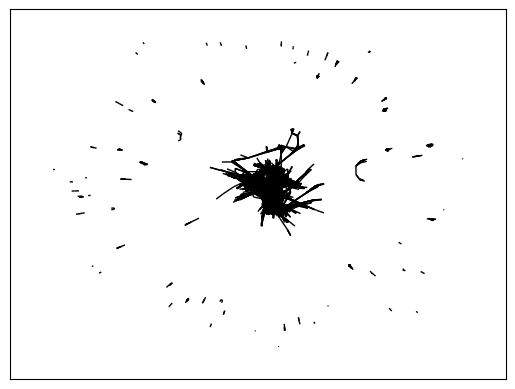

In [24]:
# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='black')

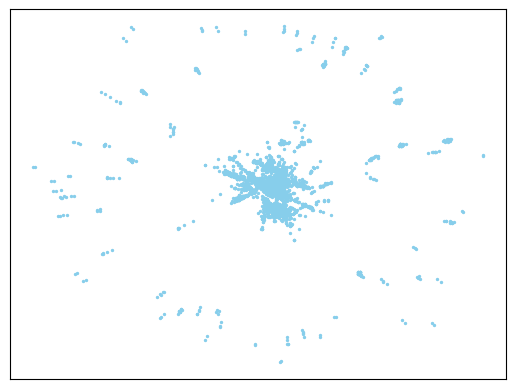

In [29]:
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2, node_color='skyblue')

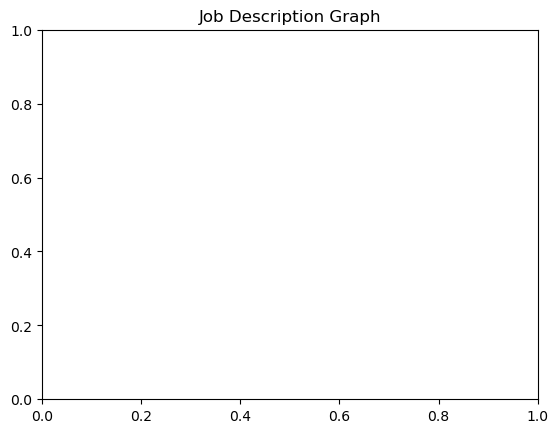

In [33]:
# Draw node labels if desired
# nx.draw_networkx_labels(G, pos)

plt.title('Job Description Graph')
plt.savefig('job_description_graph.png')  # Save the graph as an image
plt.show()

# Interchange Source And Target If Wrong

In [34]:
import pandas as pd

In [35]:
# Read the CSV file into a DataFrame
df = pd.read_csv('connectionssss.csv')
df

,source,target
0,providing support director admin manager assis...,"['Budgets', 'Customer Service', 'Leadership', ..."
1,providing support director admin manager assis...,"['Classroom', 'Classroom Management', 'Communi..."
2,providing support director admin manager assis...,"['Customer Service', 'Event Management', 'Even..."
3,providing support director admin manager assis...,"['Customer Service', 'Data Entry', 'English', ..."
4,providing support director admin manager assis...,"['Customer Service', 'English', 'Event Managem..."
...,...,...
83644,job description position provide prospects lea...,"['Account Management', 'Budgets', 'Business An..."
83645,looking dynamic meticulous bid assurance consu...,"['Business Analysis', 'Business Development', ..."
83646,"['Business Analysis', 'Business Development', ...",established bank currently looking operational...
83647,wood currently looking hire electrical designe...,"['AutoCAD', 'CAD', 'Commissioning', 'Construct..."


In [36]:
# Function to swap values if source starts with skills
def swap_values(row):
    if row['source'].startswith('[') and row['source'].endswith(']'):
        return row['target'], row['source']
    return row['source'], row['target']

In [37]:
# Apply the function to each row
df['source'], df['target'] = zip(*df.apply(swap_values, axis=1))

In [38]:
# Save the updated DataFrame to a new CSV file
df.to_csv('finalconnectionssss.csv', index=False)

# Indexing of the Source and Target Generated

In [39]:
# Read the connections file
connections_df = pd.read_csv('finalconnectionssss.csv')
connections_df

,source,target
0,providing support director admin manager assis...,"['Budgets', 'Customer Service', 'Leadership', ..."
1,providing support director admin manager assis...,"['Classroom', 'Classroom Management', 'Communi..."
2,providing support director admin manager assis...,"['Customer Service', 'Event Management', 'Even..."
3,providing support director admin manager assis...,"['Customer Service', 'Data Entry', 'English', ..."
4,providing support director admin manager assis...,"['Customer Service', 'English', 'Event Managem..."
...,...,...
83644,job description position provide prospects lea...,"['Account Management', 'Budgets', 'Business An..."
83645,looking dynamic meticulous bid assurance consu...,"['Business Analysis', 'Business Development', ..."
83646,established bank currently looking operational...,"['Business Analysis', 'Business Development', ..."
83647,wood currently looking hire electrical designe...,"['AutoCAD', 'CAD', 'Commissioning', 'Construct..."


In [40]:
# Initialize a dictionary to store unique numbers for each unique source and target combination
node_dict = {}
current_source_number = 1
current_target_number = 100000

In [41]:
# Function to assign unique numbers to source and target
def assign_node_number(row):
    global current_source_number, current_target_number
    source = row['source']
    target = row['target']
    
    # If source or target is not already assigned a number, assign a new number
    if source not in node_dict:
        node_dict[source] = current_source_number
        current_source_number += 1
    if target not in node_dict:
        node_dict[target] = current_target_number
        current_target_number += 1
    
    # Return the assigned numbers
    return pd.Series([node_dict[source], node_dict[target]])

In [42]:
# Apply the function to the connections DataFrame
connections_df[['source_number', 'target_number']] = connections_df.apply(assign_node_number, axis=1)

In [43]:
# Save the DataFrame with assigned numbers to a new CSV file
connections_df.to_csv('indexedfile.csv', index=False)

In [44]:
connections_df = pd.read_csv('indexedfile.csv')
connections_df

,source,target,source_number,target_number
0,providing support director admin manager assis...,"['Budgets', 'Customer Service', 'Leadership', ...",1,100000
1,providing support director admin manager assis...,"['Classroom', 'Classroom Management', 'Communi...",1,100001
2,providing support director admin manager assis...,"['Customer Service', 'Event Management', 'Even...",1,100002
3,providing support director admin manager assis...,"['Customer Service', 'Data Entry', 'English', ...",1,100003
4,providing support director admin manager assis...,"['Customer Service', 'English', 'Event Managem...",1,100004
...,...,...,...,...
83644,job description position provide prospects lea...,"['Account Management', 'Budgets', 'Business An...",3639,100937
83645,looking dynamic meticulous bid assurance consu...,"['Business Analysis', 'Business Development', ...",3280,100938
83646,established bank currently looking operational...,"['Business Analysis', 'Business Development', ...",3640,100938
83647,wood currently looking hire electrical designe...,"['AutoCAD', 'CAD', 'Commissioning', 'Construct...",3641,100939


# Finding Out The Largest Weakly Connected Component 

In [45]:
# Read the CSV file into a DataFrame
df = pd.read_csv('indexedfile.csv')
df

,source,target,source_number,target_number
0,providing support director admin manager assis...,"['Budgets', 'Customer Service', 'Leadership', ...",1,100000
1,providing support director admin manager assis...,"['Classroom', 'Classroom Management', 'Communi...",1,100001
2,providing support director admin manager assis...,"['Customer Service', 'Event Management', 'Even...",1,100002
3,providing support director admin manager assis...,"['Customer Service', 'Data Entry', 'English', ...",1,100003
4,providing support director admin manager assis...,"['Customer Service', 'English', 'Event Managem...",1,100004
...,...,...,...,...
83644,job description position provide prospects lea...,"['Account Management', 'Budgets', 'Business An...",3639,100937
83645,looking dynamic meticulous bid assurance consu...,"['Business Analysis', 'Business Development', ...",3280,100938
83646,established bank currently looking operational...,"['Business Analysis', 'Business Development', ...",3640,100938
83647,wood currently looking hire electrical designe...,"['AutoCAD', 'CAD', 'Commissioning', 'Construct...",3641,100939


In [46]:
# Create a directed graph
G = nx.from_pandas_edgelist(df, 'source', 'target', create_using=nx.DiGraph())
G


In [47]:
# Find weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))


In [48]:
# Find the weakly connected component with the maximum size
largest_weakly_connected_component = max(weakly_connected_components, key=len)



In [49]:
# Initialize lists to store edges, source numbers, and target numbers
largest_component_edges = []
source_numbers = []
target_numbers = []


In [50]:
# Extract the edges, source numbers, and target numbers corresponding to the largest weakly connected component
for source, target in G.edges():
    if source in largest_weakly_connected_component and target in largest_weakly_connected_component:
        largest_component_edges.append((source, target))
        source_numbers.append(df[df['source'] == source]['source_number'].values[0])
        target_numbers.append(df[df['target'] == target]['target_number'].values[0])



In [51]:
# Combine the lists into a list of tuples (source, source_number, target, target_number)
data = list(zip(largest_component_edges, source_numbers, target_numbers))

In [52]:
# Convert the data to a DataFrame
df_largest_component = pd.DataFrame(data, columns=['edge', 'source_number', 'target_number'])

In [53]:
# Split the 'edge' column into 'source' and 'target' columns
df_largest_component[['source', 'target']] = pd.DataFrame(df_largest_component['edge'].tolist())

In [54]:
# Drop the 'edge' column
df_largest_component.drop(columns=['edge'], inplace=True)

In [55]:
# Save the DataFrame to a new CSV file
df_largest_component.to_csv('largest_weakly_connected_component_with_numbers.csv', index=False)

In [56]:
# Draw the graph with only the largest weakly connected component
H = G.subgraph(largest_weakly_connected_component)

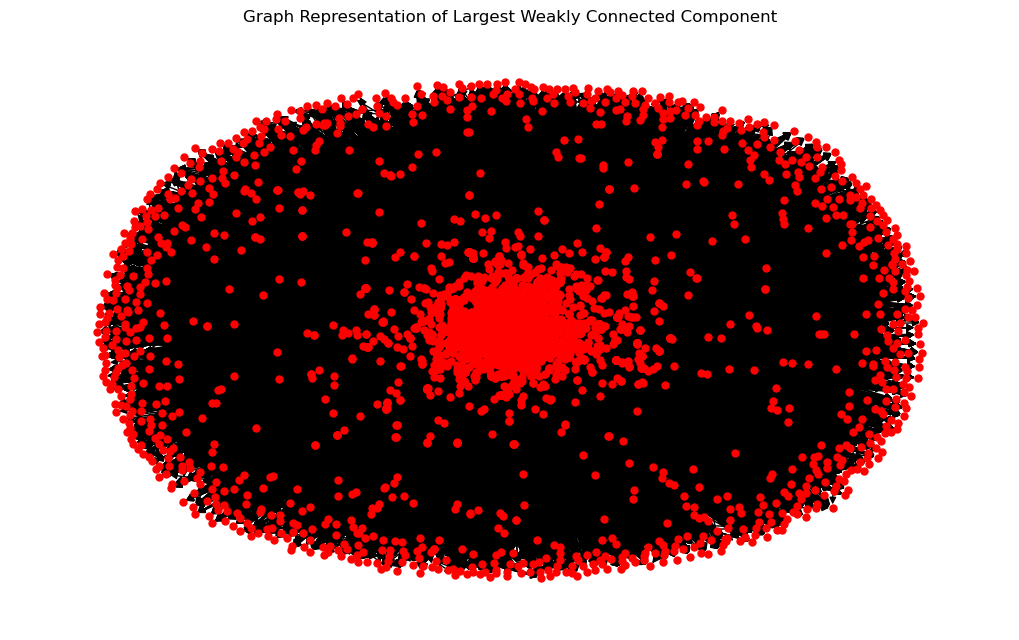

In [58]:
plt.figure(figsize=(10, 6))
nx.draw(H, node_color='red', node_size=25, edge_color='black', arrows=True)
plt.title("Graph Representation of Largest Weakly Connected Component")
plt.show()

# Indexing of Weakly Connected Source And Targets


In [60]:
# Read the connections file with source and target numbers
connections_df = pd.read_csv('largest_weakly_connected_component_with_numbers.csv')
connections_df

,source_number,target_number,source,target
0,1,100000,providing support director admin manager assis...,"['Budgets', 'Customer Service', 'Leadership', ..."
1,1,100001,providing support director admin manager assis...,"['Classroom', 'Classroom Management', 'Communi..."
2,1,100002,providing support director admin manager assis...,"['Customer Service', 'Event Management', 'Even..."
3,1,100003,providing support director admin manager assis...,"['Customer Service', 'Data Entry', 'English', ..."
4,1,100004,providing support director admin manager assis...,"['Customer Service', 'English', 'Event Managem..."
...,...,...,...,...
83047,3597,100906,school international studies graduate school n...,"['Analysis', 'Business Strategy', 'Curriculum ..."
83048,3612,100921,execute co ordinate activities job holder resp...,"['CDMA', 'Design of Experiments', 'Electronics..."
83049,3613,100921,wood opportunity senior principal rotating mac...,"['CDMA', 'Design of Experiments', 'Electronics..."
83050,3614,100921,sustain provide continuous process improvement...,"['CDMA', 'Design of Experiments', 'Electronics..."


In [62]:
# Read the job description and skills required file
job_skills_df = pd.read_csv('filtered_jobs.csv')
job_skills_df

,job_title,job_description,skills_required,numeric_experience
0,Admin Assistant,providing support director admin manager assis...,"['Access', 'Customer Service', 'Data Entry', '...",1
1,Visual Designer,company overview google conventional company i...,"['Adobe Creative Suite', 'Advertising', 'Art D...",5
2,IT Manager,manager manager job involves vast array duties...,"['Active Directory', 'Business Analysis', 'Cha...",5
3,Active Directory Consultant,undertaking various active directory projects ...,"['Analysis', 'Business Analysis', 'Business De...",4
4,Senior Consultant,provide l support sap hcm related issues troub...,"['Analysis', 'Business Analysis', 'Business De...",8
...,...,...,...,...
3991,Assistant Director / Senior Manager / Manager,physical activity weight management aim make p...,"['Analysis', 'Budgets', 'Business Analysis', '...",2
3992,Store Manager,store manager oversees end end operations stor...,"['Customer Satisfaction', 'Customer Service', ...",5
3993,Designer,boards design development presentation design ...,"['Adobe Creative Suite', 'Advertising', 'Art D...",3
3994,Executive - Sales & Marketing,steer initiatives building healthy business re...,"['Account Management', 'B2B', 'Business Develo...",2


In [63]:
# Initialize dictionaries to map job description and skills to their corresponding numbers
job_description_mapping = {}
skills_required_mapping = {}

In [64]:
# Function to map job description and skills to their corresponding numbers
def map_numbers(row):
    source = row['source']
    target = row['target']
    source_number = connections_df.loc[connections_df['source'] == source, 'source_number'].iloc[0]
    target_number = connections_df.loc[connections_df['target'] == target, 'target_number'].iloc[0]
    
    # Map job description and skills to their corresponding numbers
    job_description_mapping[source] = source_number
    skills_required_mapping[target] = target_number

In [65]:
# Apply the mapping function to the connections DataFrame
connections_df.apply(map_numbers, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
83047    None
83048    None
83049    None
83050    None
83051    None
Length: 83052, dtype: object

In [66]:
# Map job description and skills to their corresponding numbers in the job_skills DataFrame
job_skills_df['job_description_number'] = job_skills_df['job_description'].map(job_description_mapping)
job_skills_df['skills_required_number'] = job_skills_df['skills_required'].map(skills_required_mapping)

In [67]:
# Save the DataFrame with assigned numbers to a new CSV file
job_skills_df.to_csv('weaklyindexedfile.csv', index=False)

In [68]:
df = pd.read_csv('weaklyindexedfile.csv')
df

,job_title,job_description,skills_required,numeric_experience,job_description_number,skills_required_number
0,Admin Assistant,providing support director admin manager assis...,"['Access', 'Customer Service', 'Data Entry', '...",1,1.0,100019.0
1,Visual Designer,company overview google conventional company i...,"['Adobe Creative Suite', 'Advertising', 'Art D...",5,1065.0,100074.0
2,IT Manager,manager manager job involves vast array duties...,"['Active Directory', 'Business Analysis', 'Cha...",5,1101.0,100090.0
3,Active Directory Consultant,undertaking various active directory projects ...,"['Analysis', 'Business Analysis', 'Business De...",4,930.0,100099.0
4,Senior Consultant,provide l support sap hcm related issues troub...,"['Analysis', 'Business Analysis', 'Business De...",8,1102.0,100098.0
...,...,...,...,...,...,...
3991,Assistant Director / Senior Manager / Manager,physical activity weight management aim make p...,"['Analysis', 'Budgets', 'Business Analysis', '...",2,NaN,100162.0
3992,Store Manager,store manager oversees end end operations stor...,"['Customer Satisfaction', 'Customer Service', ...",5,NaN,100757.0
3993,Designer,boards design development presentation design ...,"['Adobe Creative Suite', 'Advertising', 'Art D...",3,NaN,100074.0
3994,Executive - Sales & Marketing,steer initiatives building healthy business re...,"['Account Management', 'B2B', 'Business Develo...",2,NaN,100398.0


In [69]:
# Create a DataFrame for weaklyindexedjob and drop rows where 'job_description_number' is missing
weaklyindexedjob = df[['job_title', 'job_description', 'numeric_experience', 'job_description_number']].dropna(subset=['job_description_number'])

In [70]:
# Create a DataFrame for weaklyindexedskills and drop rows where 'skills_required_number' is missing
weaklyindexedskills = df[['job_title', 'skills_required', 'numeric_experience', 'skills_required_number']].dropna(subset=['skills_required_number'])


In [71]:
# Save the new DataFrames to CSV files
weaklyindexedjob.to_csv('finalweaklyindexedjob.csv', index=False)
weaklyindexedskills.to_csv('finalweaklyindexedskills.csv', index=False)

In [72]:
# Read the new CSV file
finalweaklyindexedjob = pd.read_csv('finalweaklyindexedjob.csv')
finalweaklyindexedjob

,job_title,job_description,numeric_experience,job_description_number
0,Admin Assistant,providing support director admin manager assis...,1,1.0
1,Visual Designer,company overview google conventional company i...,5,1065.0
2,IT Manager,manager manager job involves vast array duties...,5,1101.0
3,Active Directory Consultant,undertaking various active directory projects ...,4,930.0
4,Senior Consultant,provide l support sap hcm related issues troub...,8,1102.0
...,...,...,...,...
3514,"DevOps Engineer, Government Digital Services",government digital services gds team aims spea...,4,2147.0
3515,DevOps Engineer,government digital services gds team aims spea...,1,2148.0
3516,"Assistant Director / Principal Manager, Soluti...",responsibilities provide technical expertise c...,4,713.0
3517,Administrative Executive,consulting pte ltd founded singapore building ...,5,2357.0


In [73]:
# Read the new CSV file
finalweaklyindexedskills = pd.read_csv('finalweaklyindexedskills.csv')
finalweaklyindexedskills

,job_title,skills_required,numeric_experience,skills_required_number
0,Admin Assistant,"['Access', 'Customer Service', 'Data Entry', '...",1,100019.0
1,Visual Designer,"['Adobe Creative Suite', 'Advertising', 'Art D...",5,100074.0
2,IT Manager,"['Active Directory', 'Business Analysis', 'Cha...",5,100090.0
3,Active Directory Consultant,"['Analysis', 'Business Analysis', 'Business De...",4,100099.0
4,Senior Consultant,"['Analysis', 'Business Analysis', 'Business De...",8,100098.0
...,...,...,...,...
3578,Assistant Director / Senior Manager / Manager,"['Analysis', 'Budgets', 'Business Analysis', '...",2,100162.0
3579,Store Manager,"['Customer Satisfaction', 'Customer Service', ...",5,100757.0
3580,Designer,"['Adobe Creative Suite', 'Advertising', 'Art D...",3,100074.0
3581,Executive - Sales & Marketing,"['Account Management', 'B2B', 'Business Develo...",2,100398.0


# Glove Vectorization For Job File

In [75]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors

In [76]:
# Load pre-trained GloVe embeddings
glove_path = "glove.6B.100d.txt"  # Update with the path to your GloVe file
embeddings_index = {}
with open(glove_path, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

In [107]:
# Load your dataset
data_path = "finalweaklyindexedjob.csv"
df = pd.read_csv(data_path)
df

,job_title,job_description,numeric_experience,job_description_number
0,Admin Assistant,providing support director admin manager assis...,1,1.0
1,Visual Designer,company overview google conventional company i...,5,1065.0
2,IT Manager,manager manager job involves vast array duties...,5,1101.0
3,Active Directory Consultant,undertaking various active directory projects ...,4,930.0
4,Senior Consultant,provide l support sap hcm related issues troub...,8,1102.0
...,...,...,...,...
3514,"DevOps Engineer, Government Digital Services",government digital services gds team aims spea...,4,2147.0
3515,DevOps Engineer,government digital services gds team aims spea...,1,2148.0
3516,"Assistant Director / Principal Manager, Soluti...",responsibilities provide technical expertise c...,4,713.0
3517,Administrative Executive,consulting pte ltd founded singapore building ...,5,2357.0


In [108]:
# Combine relevant text columns into a single column
df['combined_text'] =   df['job_description']
# Preprocess text data
df['combined_text'] = df['combined_text'].astype(str)

In [109]:
# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['combined_text'])
sequences = tokenizer.texts_to_sequences(df['combined_text'])
X = pad_sequences(sequences)


In [110]:
# Create an embedding matrix using GloVe embeddings
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_dim = 100  # Update with the dimension of your GloVe embeddings
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [111]:
# Compute the mean GloVe vector for each document
combined_vectors = []
for sequence in sequences:
    doc_vector = np.mean([embedding_matrix[i] for i in sequence if i < num_words], axis=0)
    combined_vectors.append(doc_vector)

In [112]:
# Add the combined GloVe vectors as a new column named 'combined_vector' in the original DataFrame
df['job_description_vector'] = combined_vectors 

In [113]:
# Save the updated DataFrame in the CSV file
df[['job_description_number', 'job_description_vector']].to_csv('jobvectorised.csv', index=False)  

In [114]:
# Read the 'jobvectorised.csv' file
jobvectorised_df = pd.read_csv('jobvectorised.csv')

In [115]:
jobvectorised_df

,job_description_number,job_description_vector
0,1.0,[-1.07281187e-01 1.09823687e-01 -6.48854703e-...
1,1065.0,[-0.0458995 0.19138695 0.06613113 0.125089...
2,1101.0,[-2.01151743e-01 7.03670314e-02 1.18829723e-...
3,930.0,[-0.14578479 0.18874611 0.04295121 0.096824...
4,1102.0,[-1.22909133e-01 1.66175594e-01 6.54830751e-...
...,...,...
3514,2147.0,[-0.16971045 0.21869789 0.00600964 0.112656...
3515,2148.0,[-1.15926635e-01 1.88045996e-01 5.62578953e-...
3516,713.0,[-0.14141276 0.19880056 -0.00343323 0.145856...
3517,2357.0,[ 0.05998196 0.1227034 -0.03622009 0.001975...


# Glove Vectorization For Skills File

In [86]:
# Load your dataset
data_path = "finalweaklyindexedskills.csv"
df = pd.read_csv(data_path)
df

,job_title,skills_required,numeric_experience,skills_required_number
0,Admin Assistant,"['Access', 'Customer Service', 'Data Entry', '...",1,100019.0
1,Visual Designer,"['Adobe Creative Suite', 'Advertising', 'Art D...",5,100074.0
2,IT Manager,"['Active Directory', 'Business Analysis', 'Cha...",5,100090.0
3,Active Directory Consultant,"['Analysis', 'Business Analysis', 'Business De...",4,100099.0
4,Senior Consultant,"['Analysis', 'Business Analysis', 'Business De...",8,100098.0
...,...,...,...,...
3578,Assistant Director / Senior Manager / Manager,"['Analysis', 'Budgets', 'Business Analysis', '...",2,100162.0
3579,Store Manager,"['Customer Satisfaction', 'Customer Service', ...",5,100757.0
3580,Designer,"['Adobe Creative Suite', 'Advertising', 'Art D...",3,100074.0
3581,Executive - Sales & Marketing,"['Account Management', 'B2B', 'Business Develo...",2,100398.0


In [87]:
# Combine relevant text columns into a single column
df['combined_text'] =    df['numeric_experience'].astype(str) + ' ' + df['skills_required']
# Preprocess text data
df['combined_text'] = df['combined_text'].astype(str)

In [88]:
# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['combined_text'])
sequences = tokenizer.texts_to_sequences(df['combined_text'])
X = pad_sequences(sequences)

In [89]:
# Create an embedding matrix using GloVe embeddings
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_dim = 100  # Update with the dimension of your GloVe embeddings
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [90]:
# Compute the mean GloVe vector for each document
combined_vectors = []
for sequence in sequences:
    doc_vector = np.mean([embedding_matrix[i] for i in sequence if i < num_words], axis=0)
    combined_vectors.append(doc_vector)

In [91]:
# Add the combined GloVe vectors as a new column named 'combined_vector' in the original DataFrame
df['skills_required_vector'] = combined_vectors


In [92]:
# Save the updated DataFrame in the CSV file
df[['skills_required_number', 'skills_required_vector']].to_csv('skillsvectorised.csv', index=False)  

In [96]:
# Read the 'jobvectorised.csv' file
skillvectorised_df = pd.read_csv('skillsvectorised.csv')

In [97]:
skillvectorised_df

,skills_required_number,skills_required_vector
0,100019.0,[-9.76333293e-03 1.95854541e-02 8.27636344e-...
1,100074.0,[-1.38488237e-02 -1.38673526e-03 7.90296232e-...
2,100090.0,[-1.50141666e-02 6.51972203e-03 -9.39563910e-...
3,100099.0,[-7.28656258e-03 1.15290629e-02 8.84499983e-...
4,100098.0,[-0.0171326 0.0106156 -0.00306177 0.010246...
...,...,...
3578,100162.0,[-0.01105114 0.01749514 0.00422743 0.004234...
3579,100757.0,[-3.57909094e-03 1.11466664e-02 2.30112130e-...
3580,100074.0,[-1.79667648e-02 4.67382919e-04 3.45000230e-...
3581,100398.0,[-0.01067797 0.01618339 -0.00368545 -0.004036...


# Seperate the Vectors in Job File

In [116]:
# Read the CSV file into a DataFrame
df = pd.read_csv('jobvectorised.csv')
df

,job_description_number,job_description_vector
0,1.0,[-1.07281187e-01 1.09823687e-01 -6.48854703e-...
1,1065.0,[-0.0458995 0.19138695 0.06613113 0.125089...
2,1101.0,[-2.01151743e-01 7.03670314e-02 1.18829723e-...
3,930.0,[-0.14578479 0.18874611 0.04295121 0.096824...
4,1102.0,[-1.22909133e-01 1.66175594e-01 6.54830751e-...
...,...,...
3514,2147.0,[-0.16971045 0.21869789 0.00600964 0.112656...
3515,2148.0,[-1.15926635e-01 1.88045996e-01 5.62578953e-...
3516,713.0,[-0.14141276 0.19880056 -0.00343323 0.145856...
3517,2357.0,[ 0.05998196 0.1227034 -0.03622009 0.001975...


In [117]:
# Split the "job_description_vector" column into multiple columns
df_vectors = df['job_description_vector'].str.strip('[]').str.split(expand=True)

In [118]:
# Rename the columns to have meaningful names
num_cols = df_vectors.shape[1]
new_column_names = [f'vector_{i+1}' for i in range(num_cols)]
df_vectors.columns = new_column_names


In [119]:
# Concatenate the original DataFrame with the new DataFrame containing the split vectors
df_concatenated = pd.concat([df, df_vectors], axis=1)
df_concatenated

,job_description_number,job_description_vector,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,1.0,[-1.07281187e-01 1.09823687e-01 -6.48854703e-...,-1.07281187e-01,1.09823687e-01,-6.48854703e-02,-5.99959144e-02,1.89857490e-01,-1.47088032e-01,-5.27756568e-02,1.96149060e-01,...,-1.42207456e-02,1.34470662e-01,1.07579467e-01,-1.71726875e-01,-1.21283396e-01,-2.37291492e-02,8.44607568e-02,-1.84634531e-01,5.58334996e-01,2.29164373e-01
1,1065.0,[-0.0458995 0.19138695 0.06613113 0.125089...,-0.0458995,0.19138695,0.06613113,0.12508955,0.1451779,-0.20507148,-0.13006727,-0.09623416,...,-0.01355007,0.07980182,0.05170739,-0.1716293,-0.06165374,0.06481898,-0.28168963,-0.43509817,0.60452517,0.25237336
2,1101.0,[-2.01151743e-01 7.03670314e-02 1.18829723e-...,-2.01151743e-01,7.03670314e-02,1.18829723e-01,-7.25771886e-02,1.44873801e-01,-1.29125747e-01,-1.63241264e-01,-5.01696744e-02,...,8.93032922e-02,9.01302838e-02,2.21662983e-02,-4.43397967e-02,-8.19817109e-02,1.80010473e-01,-5.15193563e-02,-2.60286815e-01,6.00820484e-01,1.96860184e-01
3,930.0,[-0.14578479 0.18874611 0.04295121 0.096824...,-0.14578479,0.18874611,0.04295121,0.0968243,0.11517094,-0.24998624,-0.13983094,-0.02473707,...,0.01849081,0.02940176,-0.03732025,-0.06045158,-0.01993491,0.2106226,-0.11580844,-0.31746042,0.6291739,0.25537348
4,1102.0,[-1.22909133e-01 1.66175594e-01 6.54830751e-...,-1.22909133e-01,1.66175594e-01,6.54830751e-02,1.30222525e-01,9.29157724e-02,-2.54175884e-01,-1.26772326e-01,1.63579182e-02,...,-9.70656483e-02,-3.10411092e-02,-7.44250006e-02,4.11198056e-02,8.92536163e-03,2.06212104e-01,-1.09860878e-01,-4.19319632e-01,6.04263773e-01,2.36264090e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2147.0,[-0.16971045 0.21869789 0.00600964 0.112656...,-0.16971045,0.21869789,0.00600964,0.11265651,0.1338934,-0.2774359,-0.18062443,-0.1092449,...,0.04678636,-0.00182376,-0.01724794,0.03839225,0.00633527,0.08629118,-0.18421315,-0.40514057,0.57061474,0.26979491
3515,2148.0,[-1.15926635e-01 1.88045996e-01 5.62578953e-...,-1.15926635e-01,1.88045996e-01,5.62578953e-02,7.55051938e-02,2.44392447e-01,-2.82466391e-01,-1.43152008e-01,-2.56056726e-02,...,1.03906969e-01,7.10915961e-02,-5.97574728e-02,-1.64224132e-03,2.96577085e-02,2.93487178e-02,-6.41405137e-02,-3.20585503e-01,5.71260365e-01,2.00770873e-01
3516,713.0,[-0.14141276 0.19880056 -0.00343323 0.145856...,-0.14141276,0.19880056,-0.00343323,0.145856,0.13690667,-0.28977476,-0.15976357,0.0379871,...,-0.03489529,0.02290227,-0.09852001,-0.04153343,-0.01471179,0.18223942,-0.18105105,-0.4071633,0.65584183,0.28394084
3517,2357.0,[ 0.05998196 0.1227034 -0.03622009 0.001975...,0.05998196,0.1227034,-0.03622009,0.00197504,0.18129181,-0.19714901,-0.29174628,0.14643145,...,0.03645157,-0.1242591,-0.02652019,-0.01874524,-0.20432036,0.30690294,-0.19812103,-0.35552044,0.55542956,0.08872992


In [120]:
# Drop the column 'job_description_vector'
df_concatenated = df_concatenated.drop(columns=['job_description_vector'])

In [121]:
# Save the modified DataFrame back to a CSV file
df_concatenated.to_csv('jobvector.csv', index=False)
df_concatenated

,job_description_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,1.0,-1.07281187e-01,1.09823687e-01,-6.48854703e-02,-5.99959144e-02,1.89857490e-01,-1.47088032e-01,-5.27756568e-02,1.96149060e-01,-2.48716907e-02,...,-1.42207456e-02,1.34470662e-01,1.07579467e-01,-1.71726875e-01,-1.21283396e-01,-2.37291492e-02,8.44607568e-02,-1.84634531e-01,5.58334996e-01,2.29164373e-01
1,1065.0,-0.0458995,0.19138695,0.06613113,0.12508955,0.1451779,-0.20507148,-0.13006727,-0.09623416,-0.00790042,...,-0.01355007,0.07980182,0.05170739,-0.1716293,-0.06165374,0.06481898,-0.28168963,-0.43509817,0.60452517,0.25237336
2,1101.0,-2.01151743e-01,7.03670314e-02,1.18829723e-01,-7.25771886e-02,1.44873801e-01,-1.29125747e-01,-1.63241264e-01,-5.01696744e-02,4.21221067e-02,...,8.93032922e-02,9.01302838e-02,2.21662983e-02,-4.43397967e-02,-8.19817109e-02,1.80010473e-01,-5.15193563e-02,-2.60286815e-01,6.00820484e-01,1.96860184e-01
3,930.0,-0.14578479,0.18874611,0.04295121,0.0968243,0.11517094,-0.24998624,-0.13983094,-0.02473707,-0.01347872,...,0.01849081,0.02940176,-0.03732025,-0.06045158,-0.01993491,0.2106226,-0.11580844,-0.31746042,0.6291739,0.25537348
4,1102.0,-1.22909133e-01,1.66175594e-01,6.54830751e-02,1.30222525e-01,9.29157724e-02,-2.54175884e-01,-1.26772326e-01,1.63579182e-02,-9.48496846e-03,...,-9.70656483e-02,-3.10411092e-02,-7.44250006e-02,4.11198056e-02,8.92536163e-03,2.06212104e-01,-1.09860878e-01,-4.19319632e-01,6.04263773e-01,2.36264090e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2147.0,-0.16971045,0.21869789,0.00600964,0.11265651,0.1338934,-0.2774359,-0.18062443,-0.1092449,-0.08571911,...,0.04678636,-0.00182376,-0.01724794,0.03839225,0.00633527,0.08629118,-0.18421315,-0.40514057,0.57061474,0.26979491
3515,2148.0,-1.15926635e-01,1.88045996e-01,5.62578953e-02,7.55051938e-02,2.44392447e-01,-2.82466391e-01,-1.43152008e-01,-2.56056726e-02,5.60278948e-02,...,1.03906969e-01,7.10915961e-02,-5.97574728e-02,-1.64224132e-03,2.96577085e-02,2.93487178e-02,-6.41405137e-02,-3.20585503e-01,5.71260365e-01,2.00770873e-01
3516,713.0,-0.14141276,0.19880056,-0.00343323,0.145856,0.13690667,-0.28977476,-0.15976357,0.0379871,-0.06046536,...,-0.03489529,0.02290227,-0.09852001,-0.04153343,-0.01471179,0.18223942,-0.18105105,-0.4071633,0.65584183,0.28394084
3517,2357.0,0.05998196,0.1227034,-0.03622009,0.00197504,0.18129181,-0.19714901,-0.29174628,0.14643145,-0.18038892,...,0.03645157,-0.1242591,-0.02652019,-0.01874524,-0.20432036,0.30690294,-0.19812103,-0.35552044,0.55542956,0.08872992


# Seperate the Vectors in Skills File

In [122]:
# Read the CSV file into a DataFrame
df = pd.read_csv('skillsvectorised.csv')
df

,skills_required_number,skills_required_vector
0,100019.0,[-9.76333293e-03 1.95854541e-02 8.27636344e-...
1,100074.0,[-1.38488237e-02 -1.38673526e-03 7.90296232e-...
2,100090.0,[-1.50141666e-02 6.51972203e-03 -9.39563910e-...
3,100099.0,[-7.28656258e-03 1.15290629e-02 8.84499983e-...
4,100098.0,[-0.0171326 0.0106156 -0.00306177 0.010246...
...,...,...
3578,100162.0,[-0.01105114 0.01749514 0.00422743 0.004234...
3579,100757.0,[-3.57909094e-03 1.11466664e-02 2.30112130e-...
3580,100074.0,[-1.79667648e-02 4.67382919e-04 3.45000230e-...
3581,100398.0,[-0.01067797 0.01618339 -0.00368545 -0.004036...


In [123]:
# Split the "skills_required_vector" column into multiple columns
df_vectors = df['skills_required_vector'].str.strip('[]').str.split(expand=True)

In [124]:
# Rename the columns to have meaningful names
num_cols = df_vectors.shape[1]
new_column_names = [f'vector_{i+1}' for i in range(num_cols)]
df_vectors.columns = new_column_names


In [125]:
# Concatenate the original DataFrame with the new DataFrame containing the split vectors
df_concatenated = pd.concat([df, df_vectors], axis=1)
df_concatenated

,skills_required_number,skills_required_vector,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,100019.0,[-9.76333293e-03 1.95854541e-02 8.27636344e-...,-9.76333293e-03,1.95854541e-02,8.27636344e-04,1.10845457e-02,-8.17151529e-05,5.22575776e-03,3.36121212e-02,1.07424241e-02,...,-2.29572726e-02,2.33506055e-02,-1.91630306e-02,1.35218185e-02,-3.25393930e-02,-8.31757531e-03,8.68151495e-03,-5.49212143e-03,1.52036367e-02,-2.26127270e-02
1,100074.0,[-1.38488237e-02 -1.38673526e-03 7.90296232e-...,-1.38488237e-02,-1.38673526e-03,7.90296232e-05,-1.25047043e-03,5.13552649e-02,-5.76882459e-04,9.90155887e-03,8.25935284e-03,...,7.53911705e-04,5.08988241e-02,1.52500040e-03,4.59044087e-03,-8.26470729e-03,9.93187931e-03,-2.15667644e-02,-6.48970578e-02,5.71861758e-02,7.04108814e-03
2,100090.0,[-1.50141666e-02 6.51972203e-03 -9.39563910e-...,-1.50141666e-02,6.51972203e-03,-9.39563910e-03,-2.56333335e-03,7.70386122e-03,-7.29488892e-03,1.45786111e-02,3.16669444e-02,...,1.66861092e-03,8.61388900e-03,-1.07416676e-03,2.83569439e-03,-5.28277788e-02,3.23013899e-03,9.11444467e-03,-1.05616107e-02,2.08744440e-02,-7.16194428e-03
3,100099.0,[-7.28656258e-03 1.15290629e-02 8.84499983e-...,-7.28656258e-03,1.15290629e-02,8.84499983e-04,7.04937521e-03,-1.86228117e-05,4.34968760e-03,2.99221873e-02,1.60856247e-02,...,-9.42281261e-03,1.97362509e-02,-1.17265629e-02,7.56750023e-03,-3.78281251e-02,-2.65568751e-03,-1.76478131e-03,-7.46187521e-03,1.83209367e-02,-2.29568742e-02
4,100098.0,[-0.0171326 0.0106156 -0.00306177 0.010246...,-0.0171326,0.0106156,-0.00306177,0.01024629,-0.00080751,-0.01374114,0.02575229,0.04089629,...,-0.02149286,0.0134046,-0.03146914,0.02994686,-0.02344629,0.001532,0.01400723,-0.01444229,0.034268,0.00722371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,100162.0,[-0.01105114 0.01749514 0.00422743 0.004234...,-0.01105114,0.01749514,0.00422743,0.00423457,-0.00140031,0.00858886,0.02898571,0.011066,...,-0.016226,0.02072114,-0.01661829,0.01153429,-0.03058571,-0.00882686,-0.00130809,-0.00457229,0.01845914,-0.02348429
3579,100757.0,[-3.57909094e-03 1.11466664e-02 2.30112130e-...,-3.57909094e-03,1.11466664e-02,2.30112130e-03,4.37848496e-03,2.63421215e-03,1.96254547e-03,2.30851517e-02,1.70890906e-02,...,-7.43181823e-03,1.40409090e-02,-7.75000001e-03,-1.32378789e-03,-3.65606077e-02,2.12769707e-03,-4.78909097e-03,-9.38363599e-03,1.90493934e-02,-2.09645448e-02
3580,100074.0,[-1.79667648e-02 4.67382919e-04 3.45000230e-...,-1.79667648e-02,4.67382919e-04,3.45000230e-04,-1.32235137e-04,4.78488825e-02,5.90941047e-04,1.34397940e-02,4.60288224e-03,...,-8.79432420e-03,5.48241178e-02,-4.33441142e-03,1.47123530e-02,-5.24117754e-03,5.09687916e-03,-2.09220586e-02,-6.24164698e-02,5.53708830e-02,6.56382345e-04
3581,100398.0,[-0.01067797 0.01618339 -0.00368545 -0.004036...,-0.01067797,0.01618339,-0.00368545,-0.00403697,-0.00285039,-0.01381061,0.02701182,0.00823091,...,-0.00500939,0.02725667,-0.00364606,-0.00251788,-0.04230515,0.00707333,0.00652415,-0.01633636,0.06235061,-0.00556818


In [126]:
# Drop the column 'job_description_vector'
df_concatenated = df_concatenated.drop(columns=['skills_required_vector'])

In [127]:
# Save the modified DataFrame back to a CSV file
df_concatenated.to_csv('skillsvector.csv', index=False)
df_concatenated

,skills_required_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,100019.0,-9.76333293e-03,1.95854541e-02,8.27636344e-04,1.10845457e-02,-8.17151529e-05,5.22575776e-03,3.36121212e-02,1.07424241e-02,-9.96363660e-04,...,-2.29572726e-02,2.33506055e-02,-1.91630306e-02,1.35218185e-02,-3.25393930e-02,-8.31757531e-03,8.68151495e-03,-5.49212143e-03,1.52036367e-02,-2.26127270e-02
1,100074.0,-1.38488237e-02,-1.38673526e-03,7.90296232e-05,-1.25047043e-03,5.13552649e-02,-5.76882459e-04,9.90155887e-03,8.25935284e-03,-1.39029324e-03,...,7.53911705e-04,5.08988241e-02,1.52500040e-03,4.59044087e-03,-8.26470729e-03,9.93187931e-03,-2.15667644e-02,-6.48970578e-02,5.71861758e-02,7.04108814e-03
2,100090.0,-1.50141666e-02,6.51972203e-03,-9.39563910e-03,-2.56333335e-03,7.70386122e-03,-7.29488892e-03,1.45786111e-02,3.16669444e-02,-1.37148609e-02,...,1.66861092e-03,8.61388900e-03,-1.07416676e-03,2.83569439e-03,-5.28277788e-02,3.23013899e-03,9.11444467e-03,-1.05616107e-02,2.08744440e-02,-7.16194428e-03
3,100099.0,-7.28656258e-03,1.15290629e-02,8.84499983e-04,7.04937521e-03,-1.86228117e-05,4.34968760e-03,2.99221873e-02,1.60856247e-02,-1.35353124e-02,...,-9.42281261e-03,1.97362509e-02,-1.17265629e-02,7.56750023e-03,-3.78281251e-02,-2.65568751e-03,-1.76478131e-03,-7.46187521e-03,1.83209367e-02,-2.29568742e-02
4,100098.0,-0.0171326,0.0106156,-0.00306177,0.01024629,-0.00080751,-0.01374114,0.02575229,0.04089629,-0.00173457,...,-0.02149286,0.0134046,-0.03146914,0.02994686,-0.02344629,0.001532,0.01400723,-0.01444229,0.034268,0.00722371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,100162.0,-0.01105114,0.01749514,0.00422743,0.00423457,-0.00140031,0.00858886,0.02898571,0.011066,-0.00478029,...,-0.016226,0.02072114,-0.01661829,0.01153429,-0.03058571,-0.00882686,-0.00130809,-0.00457229,0.01845914,-0.02348429
3579,100757.0,-3.57909094e-03,1.11466664e-02,2.30112130e-03,4.37848496e-03,2.63421215e-03,1.96254547e-03,2.30851517e-02,1.70890906e-02,-1.27499998e-02,...,-7.43181823e-03,1.40409090e-02,-7.75000001e-03,-1.32378789e-03,-3.65606077e-02,2.12769707e-03,-4.78909097e-03,-9.38363599e-03,1.90493934e-02,-2.09645448e-02
3580,100074.0,-1.79667648e-02,4.67382919e-04,3.45000230e-04,-1.32235137e-04,4.78488825e-02,5.90941047e-04,1.34397940e-02,4.60288224e-03,2.60294185e-03,...,-8.79432420e-03,5.48241178e-02,-4.33441142e-03,1.47123530e-02,-5.24117754e-03,5.09687916e-03,-2.09220586e-02,-6.24164698e-02,5.53708830e-02,6.56382345e-04
3581,100398.0,-0.01067797,0.01618339,-0.00368545,-0.00403697,-0.00285039,-0.01381061,0.02701182,0.00823091,0.00156333,...,-0.00500939,0.02725667,-0.00364606,-0.00251788,-0.04230515,0.00707333,0.00652415,-0.01633636,0.06235061,-0.00556818


# Making The Number of Rows Same For Both Files

In [128]:
# Read the first file
df1 = pd.read_csv('jobvector.csv')
df1

,job_description_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,1.0,-0.107281,0.109824,-0.064885,-0.059996,0.189857,-0.147088,-0.052776,0.196149,-0.024872,...,-0.014221,0.134471,0.107579,-0.171727,-0.121283,-0.023729,0.084461,-0.184635,0.558335,0.229164
1,1065.0,-0.045900,0.191387,0.066131,0.125090,0.145178,-0.205071,-0.130067,-0.096234,-0.007900,...,-0.013550,0.079802,0.051707,-0.171629,-0.061654,0.064819,-0.281690,-0.435098,0.604525,0.252373
2,1101.0,-0.201152,0.070367,0.118830,-0.072577,0.144874,-0.129126,-0.163241,-0.050170,0.042122,...,0.089303,0.090130,0.022166,-0.044340,-0.081982,0.180010,-0.051519,-0.260287,0.600820,0.196860
3,930.0,-0.145785,0.188746,0.042951,0.096824,0.115171,-0.249986,-0.139831,-0.024737,-0.013479,...,0.018491,0.029402,-0.037320,-0.060452,-0.019935,0.210623,-0.115808,-0.317460,0.629174,0.255373
4,1102.0,-0.122909,0.166176,0.065483,0.130223,0.092916,-0.254176,-0.126772,0.016358,-0.009485,...,-0.097066,-0.031041,-0.074425,0.041120,0.008925,0.206212,-0.109861,-0.419320,0.604264,0.236264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2147.0,-0.169710,0.218698,0.006010,0.112657,0.133893,-0.277436,-0.180624,-0.109245,-0.085719,...,0.046786,-0.001824,-0.017248,0.038392,0.006335,0.086291,-0.184213,-0.405141,0.570615,0.269795
3515,2148.0,-0.115927,0.188046,0.056258,0.075505,0.244392,-0.282466,-0.143152,-0.025606,0.056028,...,0.103907,0.071092,-0.059757,-0.001642,0.029658,0.029349,-0.064141,-0.320586,0.571260,0.200771
3516,713.0,-0.141413,0.198801,-0.003433,0.145856,0.136907,-0.289775,-0.159764,0.037987,-0.060465,...,-0.034895,0.022902,-0.098520,-0.041533,-0.014712,0.182239,-0.181051,-0.407163,0.655842,0.283941
3517,2357.0,0.059982,0.122703,-0.036220,0.001975,0.181292,-0.197149,-0.291746,0.146431,-0.180389,...,0.036452,-0.124259,-0.026520,-0.018745,-0.204320,0.306903,-0.198121,-0.355520,0.555430,0.088730


In [129]:
# Read the second file
df2 = pd.read_csv('skillsvector.csv')
df2

,skills_required_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,100019.0,-0.009763,0.019585,0.000828,0.011085,-0.000082,0.005226,0.033612,0.010742,-0.000996,...,-0.022957,0.023351,-0.019163,0.013522,-0.032539,-0.008318,0.008682,-0.005492,0.015204,-0.022613
1,100074.0,-0.013849,-0.001387,0.000079,-0.001250,0.051355,-0.000577,0.009902,0.008259,-0.001390,...,0.000754,0.050899,0.001525,0.004590,-0.008265,0.009932,-0.021567,-0.064897,0.057186,0.007041
2,100090.0,-0.015014,0.006520,-0.009396,-0.002563,0.007704,-0.007295,0.014579,0.031667,-0.013715,...,0.001669,0.008614,-0.001074,0.002836,-0.052828,0.003230,0.009114,-0.010562,0.020874,-0.007162
3,100099.0,-0.007287,0.011529,0.000884,0.007049,-0.000019,0.004350,0.029922,0.016086,-0.013535,...,-0.009423,0.019736,-0.011727,0.007568,-0.037828,-0.002656,-0.001765,-0.007462,0.018321,-0.022957
4,100098.0,-0.017133,0.010616,-0.003062,0.010246,-0.000808,-0.013741,0.025752,0.040896,-0.001735,...,-0.021493,0.013405,-0.031469,0.029947,-0.023446,0.001532,0.014007,-0.014442,0.034268,0.007224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,100162.0,-0.011051,0.017495,0.004227,0.004235,-0.001400,0.008589,0.028986,0.011066,-0.004780,...,-0.016226,0.020721,-0.016618,0.011534,-0.030586,-0.008827,-0.001308,-0.004572,0.018459,-0.023484
3579,100757.0,-0.003579,0.011147,0.002301,0.004378,0.002634,0.001963,0.023085,0.017089,-0.012750,...,-0.007432,0.014041,-0.007750,-0.001324,-0.036561,0.002128,-0.004789,-0.009384,0.019049,-0.020965
3580,100074.0,-0.017967,0.000467,0.000345,-0.000132,0.047849,0.000591,0.013440,0.004603,0.002603,...,-0.008794,0.054824,-0.004334,0.014712,-0.005241,0.005097,-0.020922,-0.062416,0.055371,0.000656
3581,100398.0,-0.010678,0.016183,-0.003685,-0.004037,-0.002850,-0.013811,0.027012,0.008231,0.001563,...,-0.005009,0.027257,-0.003646,-0.002518,-0.042305,0.007073,0.006524,-0.016336,0.062351,-0.005568


In [130]:
# Trim or pad the second file to match the dimensions of the first file
if df2.shape[0] > df1.shape[0]:  # If the second file has more rows
    df2 = df2.iloc[:df1.shape[0], :]  # Trim the second file
elif df2.shape[0] < df1.shape[0]:  # If the second file has fewer rows
    # Pad the second file with NaN values to match the number of rows in the first file
    df2 = pd.concat([df2, pd.DataFrame(index=range(df1.shape[0] - df2.shape[0]), columns=df2.columns)])

In [131]:
df1

,job_description_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,1.0,-0.107281,0.109824,-0.064885,-0.059996,0.189857,-0.147088,-0.052776,0.196149,-0.024872,...,-0.014221,0.134471,0.107579,-0.171727,-0.121283,-0.023729,0.084461,-0.184635,0.558335,0.229164
1,1065.0,-0.045900,0.191387,0.066131,0.125090,0.145178,-0.205071,-0.130067,-0.096234,-0.007900,...,-0.013550,0.079802,0.051707,-0.171629,-0.061654,0.064819,-0.281690,-0.435098,0.604525,0.252373
2,1101.0,-0.201152,0.070367,0.118830,-0.072577,0.144874,-0.129126,-0.163241,-0.050170,0.042122,...,0.089303,0.090130,0.022166,-0.044340,-0.081982,0.180010,-0.051519,-0.260287,0.600820,0.196860
3,930.0,-0.145785,0.188746,0.042951,0.096824,0.115171,-0.249986,-0.139831,-0.024737,-0.013479,...,0.018491,0.029402,-0.037320,-0.060452,-0.019935,0.210623,-0.115808,-0.317460,0.629174,0.255373
4,1102.0,-0.122909,0.166176,0.065483,0.130223,0.092916,-0.254176,-0.126772,0.016358,-0.009485,...,-0.097066,-0.031041,-0.074425,0.041120,0.008925,0.206212,-0.109861,-0.419320,0.604264,0.236264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2147.0,-0.169710,0.218698,0.006010,0.112657,0.133893,-0.277436,-0.180624,-0.109245,-0.085719,...,0.046786,-0.001824,-0.017248,0.038392,0.006335,0.086291,-0.184213,-0.405141,0.570615,0.269795
3515,2148.0,-0.115927,0.188046,0.056258,0.075505,0.244392,-0.282466,-0.143152,-0.025606,0.056028,...,0.103907,0.071092,-0.059757,-0.001642,0.029658,0.029349,-0.064141,-0.320586,0.571260,0.200771
3516,713.0,-0.141413,0.198801,-0.003433,0.145856,0.136907,-0.289775,-0.159764,0.037987,-0.060465,...,-0.034895,0.022902,-0.098520,-0.041533,-0.014712,0.182239,-0.181051,-0.407163,0.655842,0.283941
3517,2357.0,0.059982,0.122703,-0.036220,0.001975,0.181292,-0.197149,-0.291746,0.146431,-0.180389,...,0.036452,-0.124259,-0.026520,-0.018745,-0.204320,0.306903,-0.198121,-0.355520,0.555430,0.088730


In [132]:
df2

,skills_required_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,100019.0,-0.009763,0.019585,0.000828,0.011085,-0.000082,0.005226,0.033612,0.010742,-0.000996,...,-0.022957,0.023351,-0.019163,0.013522,-0.032539,-0.008318,0.008682,-0.005492,0.015204,-0.022613
1,100074.0,-0.013849,-0.001387,0.000079,-0.001250,0.051355,-0.000577,0.009902,0.008259,-0.001390,...,0.000754,0.050899,0.001525,0.004590,-0.008265,0.009932,-0.021567,-0.064897,0.057186,0.007041
2,100090.0,-0.015014,0.006520,-0.009396,-0.002563,0.007704,-0.007295,0.014579,0.031667,-0.013715,...,0.001669,0.008614,-0.001074,0.002836,-0.052828,0.003230,0.009114,-0.010562,0.020874,-0.007162
3,100099.0,-0.007287,0.011529,0.000884,0.007049,-0.000019,0.004350,0.029922,0.016086,-0.013535,...,-0.009423,0.019736,-0.011727,0.007568,-0.037828,-0.002656,-0.001765,-0.007462,0.018321,-0.022957
4,100098.0,-0.017133,0.010616,-0.003062,0.010246,-0.000808,-0.013741,0.025752,0.040896,-0.001735,...,-0.021493,0.013405,-0.031469,0.029947,-0.023446,0.001532,0.014007,-0.014442,0.034268,0.007224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,100072.0,-0.010740,0.021544,0.000910,0.012193,-0.000090,0.005748,0.036973,0.011817,-0.001096,...,-0.025253,0.025686,-0.021079,0.014874,-0.035793,-0.009149,0.009550,-0.006041,0.016724,-0.024874
3515,100459.0,-0.008604,0.014363,0.002833,0.006084,-0.001076,0.003482,0.029404,0.014654,-0.009499,...,-0.018996,0.019894,-0.015166,0.010015,-0.036790,-0.003139,-0.004537,-0.007511,0.018897,-0.030297
3516,100698.0,-0.023713,-0.004835,0.017531,-0.002937,0.000294,0.003363,0.001884,0.022256,0.012882,...,-0.002236,0.019566,-0.021719,0.005243,-0.049520,0.026445,0.011556,-0.005322,0.026988,-0.011032
3517,100015.0,-0.007822,0.013057,0.002575,0.005531,-0.000978,0.003166,0.026731,0.013322,-0.008636,...,-0.017269,0.018085,-0.013787,0.009105,-0.033445,-0.002854,-0.004125,-0.006828,0.017179,-0.027543


# GCN

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read CSV files
connection_df = pd.read_csv('largest_weakly_connected_component_with_numbers.csv')
source_df = pd.read_csv('jobvector.csv')
target_df = pd.read_csv('skillsvector.csv')

In [3]:
connection_df

,source_number,target_number,source,target
0,1,100000,providing support director admin manager assis...,"['Budgets', 'Customer Service', 'Leadership', ..."
1,1,100001,providing support director admin manager assis...,"['Classroom', 'Classroom Management', 'Communi..."
2,1,100002,providing support director admin manager assis...,"['Customer Service', 'Event Management', 'Even..."
3,1,100003,providing support director admin manager assis...,"['Customer Service', 'Data Entry', 'English', ..."
4,1,100004,providing support director admin manager assis...,"['Customer Service', 'English', 'Event Managem..."
...,...,...,...,...
83047,3597,100906,school international studies graduate school n...,"['Analysis', 'Business Strategy', 'Curriculum ..."
83048,3612,100921,execute co ordinate activities job holder resp...,"['CDMA', 'Design of Experiments', 'Electronics..."
83049,3613,100921,wood opportunity senior principal rotating mac...,"['CDMA', 'Design of Experiments', 'Electronics..."
83050,3614,100921,sustain provide continuous process improvement...,"['CDMA', 'Design of Experiments', 'Electronics..."


In [4]:
source_df

,job_description_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,1.0,-0.107281,0.109824,-0.064885,-0.059996,0.189857,-0.147088,-0.052776,0.196149,-0.024872,...,-0.014221,0.134471,0.107579,-0.171727,-0.121283,-0.023729,0.084461,-0.184635,0.558335,0.229164
1,1065.0,-0.045900,0.191387,0.066131,0.125090,0.145178,-0.205071,-0.130067,-0.096234,-0.007900,...,-0.013550,0.079802,0.051707,-0.171629,-0.061654,0.064819,-0.281690,-0.435098,0.604525,0.252373
2,1101.0,-0.201152,0.070367,0.118830,-0.072577,0.144874,-0.129126,-0.163241,-0.050170,0.042122,...,0.089303,0.090130,0.022166,-0.044340,-0.081982,0.180010,-0.051519,-0.260287,0.600820,0.196860
3,930.0,-0.145785,0.188746,0.042951,0.096824,0.115171,-0.249986,-0.139831,-0.024737,-0.013479,...,0.018491,0.029402,-0.037320,-0.060452,-0.019935,0.210623,-0.115808,-0.317460,0.629174,0.255373
4,1102.0,-0.122909,0.166176,0.065483,0.130223,0.092916,-0.254176,-0.126772,0.016358,-0.009485,...,-0.097066,-0.031041,-0.074425,0.041120,0.008925,0.206212,-0.109861,-0.419320,0.604264,0.236264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2147.0,-0.169710,0.218698,0.006010,0.112657,0.133893,-0.277436,-0.180624,-0.109245,-0.085719,...,0.046786,-0.001824,-0.017248,0.038392,0.006335,0.086291,-0.184213,-0.405141,0.570615,0.269795
3515,2148.0,-0.115927,0.188046,0.056258,0.075505,0.244392,-0.282466,-0.143152,-0.025606,0.056028,...,0.103907,0.071092,-0.059757,-0.001642,0.029658,0.029349,-0.064141,-0.320586,0.571260,0.200771
3516,713.0,-0.141413,0.198801,-0.003433,0.145856,0.136907,-0.289775,-0.159764,0.037987,-0.060465,...,-0.034895,0.022902,-0.098520,-0.041533,-0.014712,0.182239,-0.181051,-0.407163,0.655842,0.283941
3517,2357.0,0.059982,0.122703,-0.036220,0.001975,0.181292,-0.197149,-0.291746,0.146431,-0.180389,...,0.036452,-0.124259,-0.026520,-0.018745,-0.204320,0.306903,-0.198121,-0.355520,0.555430,0.088730


In [5]:
target_df

,skills_required_number,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
0,100019.0,-0.009763,0.019585,0.000828,0.011085,-0.000082,0.005226,0.033612,0.010742,-0.000996,...,-0.022957,0.023351,-0.019163,0.013522,-0.032539,-0.008318,0.008682,-0.005492,0.015204,-0.022613
1,100074.0,-0.013849,-0.001387,0.000079,-0.001250,0.051355,-0.000577,0.009902,0.008259,-0.001390,...,0.000754,0.050899,0.001525,0.004590,-0.008265,0.009932,-0.021567,-0.064897,0.057186,0.007041
2,100090.0,-0.015014,0.006520,-0.009396,-0.002563,0.007704,-0.007295,0.014579,0.031667,-0.013715,...,0.001669,0.008614,-0.001074,0.002836,-0.052828,0.003230,0.009114,-0.010562,0.020874,-0.007162
3,100099.0,-0.007287,0.011529,0.000884,0.007049,-0.000019,0.004350,0.029922,0.016086,-0.013535,...,-0.009423,0.019736,-0.011727,0.007568,-0.037828,-0.002656,-0.001765,-0.007462,0.018321,-0.022957
4,100098.0,-0.017133,0.010616,-0.003062,0.010246,-0.000808,-0.013741,0.025752,0.040896,-0.001735,...,-0.021493,0.013405,-0.031469,0.029947,-0.023446,0.001532,0.014007,-0.014442,0.034268,0.007224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,100162.0,-0.011051,0.017495,0.004227,0.004235,-0.001400,0.008589,0.028986,0.011066,-0.004780,...,-0.016226,0.020721,-0.016618,0.011534,-0.030586,-0.008827,-0.001308,-0.004572,0.018459,-0.023484
3579,100757.0,-0.003579,0.011147,0.002301,0.004378,0.002634,0.001963,0.023085,0.017089,-0.012750,...,-0.007432,0.014041,-0.007750,-0.001324,-0.036561,0.002128,-0.004789,-0.009384,0.019049,-0.020965
3580,100074.0,-0.017967,0.000467,0.000345,-0.000132,0.047849,0.000591,0.013440,0.004603,0.002603,...,-0.008794,0.054824,-0.004334,0.014712,-0.005241,0.005097,-0.020922,-0.062416,0.055371,0.000656
3581,100398.0,-0.010678,0.016183,-0.003685,-0.004037,-0.002850,-0.013811,0.027012,0.008231,0.001563,...,-0.005009,0.027257,-0.003646,-0.002518,-0.042305,0.007073,0.006524,-0.016336,0.062351,-0.005568


In [6]:
# Create a graph
G = nx.Graph()
G

In [8]:
# Add nodes with attributes from source CSV
for idx, row in source_df.iterrows():
    try:
        node_id = row['job_description_number']
        attributes = {'vector': row.iloc[1:].values.astype(float)}  # Assuming GloVe vectors are in the remaining columns
        G.add_node(node_id, **attributes)
    except ValueError as e:
        print("Error in source_df at index:", idx)
        print("Row:", row)
        print("Error message:", e)

In [9]:
# Add nodes with attributes from target CSV
for idx, row in target_df.iterrows():
    try:
        node_id = row['skills_required_number']
        attributes = {'vector': row.iloc[1:].values.astype(float)}  # Assuming GloVe vectors are in the remaining columns
        G.add_node(node_id, **attributes)
    except ValueError as e:
        print("Error in target_df at index:", idx)
        print("Row:", row)
        print("Error message:", e)
        


In [10]:
# Add edges with information from connection CSV
for idx, row in connection_df.iterrows():
    source_idx = row['source_number']
    target_idx = row['target_number']
    edge_info = row.drop(['source_number', 'target_number']).to_dict()
    G.add_edge(source_idx, target_idx, **edge_info)

In [11]:
# Check if nodes have 'vector' attribute
for node_id, attributes in G.nodes(data=True):
    if 'vector' not in attributes:
        print(f"Node {node_id} does not have 'vector' attribute")


In [12]:
# Create a list of nodes to remove
nodes_to_remove = []
for node_id, attributes in G.nodes(data=True):
    if 'vector' not in attributes:
        nodes_to_remove.append(node_id)

# Remove nodes without 'vector' attribute
for node_id in nodes_to_remove:
    G.remove_node(node_id)

In [13]:
# Draw and display the graph
pos = nx.spring_layout(G)  # Positions for all nodes

# Separate nodes by type for visualization
source_nodes = [node_id for node_id in G.nodes if node_id in source_df['job_description_number'].values]
target_nodes = [node_id for node_id in G.nodes if node_id in target_df['skills_required_number'].values]


In [ ]:
# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=source_nodes, node_size=20, node_color='red', label='Source Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=target_nodes, node_size=20, node_color='blue', label='Target Nodes')

# Draw edges
nx.draw_networkx_edges(G, pos)


In [ ]:
# Draw edges
nx.draw_networkx_edges(G, pos)
# Add labels
nx.draw_networkx_labels(G, pos)
# Display legend
plt.legend()
# Display the graph
plt.show()

In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split

In [70]:

# Convert NetworkX graph to PyTorch Geometric Data object
edge_index = torch.tensor(list(G.edges)).t().contiguous()
x = torch.tensor([G.nodes[node_id]['vector'] for node_id in G.nodes], dtype=torch.float)
y = torch.tensor([1 if node_id in source_df['job_description_number'].values else 0 for node_id in G.nodes], dtype=torch.long)


In [71]:
# Split the dataset into train and test sets
train_idx, test_idx = train_test_split(range(len(y)), test_size=0.2, random_state=42)
train_mask = torch.zeros_like(y, dtype=torch.bool)
train_mask[train_idx] = True
test_mask = ~train_mask
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)

In [72]:
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        edge_index = edge_index.to(torch.long)  # Ensure edge_index has the correct data type

        # Ensure that indices are within bounds
        num_nodes = data.num_nodes
        edge_index = torch.clamp(edge_index, max=num_nodes - 1)

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [73]:
# Instantiate the model
model = GCN(input_dim=x.size(-1), hidden_dim=16, output_dim=2)

In [74]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [75]:
# Training loop
def train_model(model, data, optimizer, criterion, num_epochs=100):
    model.train()
    train_losses = []
    test_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        out = model(data)
        train_loss = criterion(out[data.train_mask], data.y[data.train_mask])
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())
        
        with torch.no_grad():
            model.eval()
            out = model(data)
            test_loss = criterion(out[data.test_mask], data.y[data.test_mask])
            test_losses.append(test_loss.item())
    return train_losses, test_losses

In [76]:
# Ensure indices are of data type int64
data.train_mask = data.train_mask.type(torch.long)
print("Data type of data.train_mask:", data.train_mask.dtype)
print("Values of data.train_mask:", data.train_mask)


Data type of data.train_mask: torch.int64
Values of data.train_mask: tensor([1, 1, 1,  ..., 1, 1, 0])


In [77]:
# Ensure indices are of data type int64
data.train_mask = data.train_mask.type(torch.long)
data.test_mask = data.test_mask.type(torch.long)

In [78]:
import numpy as np

In [79]:
# Convert index tensor to NumPy array and then back to PyTorch tensor with dtype=torch.long
index_np = data.train_mask.cpu().numpy()  # Convert to NumPy array
index_tensor = torch.tensor(index_np, dtype=torch.long)  # Convert back to PyTorch tensor

In [80]:
# Train the model
train_losses, test_losses = train_model(model, data, optimizer, criterion)


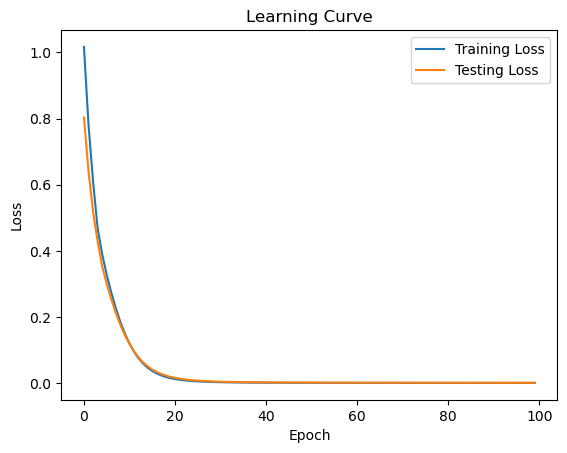

In [81]:
# Plot the learning curve
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [82]:
# Evaluate the model
model.eval()
with torch.no_grad():
    pred = model(data)

In [83]:
# Accuracy calculation
correct = pred.argmax(dim=1).eq(data.y).sum().item()
accuracy = correct / data.y.shape[0]
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8021


# GRAPHSAGE

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Read CSV files
connection_df = pd.read_csv('largest_weakly_connected_component_with_numbers.csv')
source_df = pd.read_csv('jobvector.csv')
target_df = pd.read_csv('skillsvector.csv')

In [3]:
# Create a graph
G = nx.Graph()
G

In [4]:
# Add nodes with attributes from source and target CSVs
for idx, row in source_df.iterrows():
    node_id = row['job_description_number']
    attributes = {'vector': row.iloc[1:].values.astype(float)}  # Assuming GloVe vectors are in the remaining columns
    G.add_node(node_id, **attributes)

In [5]:
for idx, row in target_df.iterrows():
    node_id = row['skills_required_number']
    attributes = {'vector': row.iloc[1:].values.astype(float)}  # Assuming GloVe vectors are in the remaining columns
    G.add_node(node_id, **attributes)


In [6]:
# Add edges with information from connection CSV
for idx, row in connection_df.iterrows():
    source_idx = row['source_number']
    target_idx = row['target_number']
    edge_info = row.drop(['source_number', 'target_number']).to_dict()
    G.add_edge(source_idx, target_idx, **edge_info)

In [7]:
# Check if nodes have 'vector' attribute
for node_id, attributes in G.nodes(data=True):
    if 'vector' not in attributes:
        print(f"Node {node_id} does not have 'vector' attribute")

In [8]:
# Create a list of nodes to remove
nodes_to_remove = []
for node_id, attributes in G.nodes(data=True):
    if 'vector' not in attributes:
        nodes_to_remove.append(node_id)


In [9]:
# Remove nodes without 'vector' attribute
for node_id in nodes_to_remove:
    G.remove_node(node_id)


In [10]:
# Convert NetworkX graph to PyTorch Geometric Data object
edge_index = torch.tensor(list(G.edges)).t().contiguous()
x = torch.tensor([G.nodes[node_id]['vector'] for node_id in G.nodes], dtype=torch.float)
y = torch.tensor([1 if node_id in source_df['job_description_number'].values else 0 for node_id in G.nodes], dtype=torch.long)


C:\Users\aggap\AppData\Local\Temp\ipykernel_15216\841959434.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  x = torch.tensor([G.nodes[node_id]['vector'] for node_id in G.nodes], dtype=torch.float)


In [11]:
# Split the dataset into train and test sets
train_idx, test_idx = train_test_split(range(len(y)), test_size=0.2, random_state=42)
#range(len(y)) telss the range of indices
train_mask = torch.zeros_like(y, dtype=torch.bool)
train_mask[train_idx] = True
test_mask = ~train_mask
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)

In [12]:
# Define GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphSAGE, self).__init__() #Calls the constructor of the superclass (nn.Module) to initialize it
        self.conv1 = SAGEConv(input_dim, hidden_dim) #Initialise
        self.conv2 = SAGEConv(hidden_dim, output_dim) #Initialise

    def forward(self, data): #defines the forward pass of the model
        x, edge_index = data.x, data.edge_index
        edge_index = edge_index.to(torch.long)  # Ensure edge_index has the correct data type

        # Ensure that indices are within bounds
        num_nodes = data.num_nodes # Gets the number of nodes in the graph
        edge_index = torch.clamp(edge_index, max=num_nodes - 1) # Ensures that indices are within bounds

        x = self.conv1(x, edge_index) # Applies the first GraphSAGE layer to the input features
        x = F.tanh(x) # Applies ReLU activation function to the output of the first GraphSAGE layer
        # Dropout prevents overfitting
        x = F.dropout(x, training=self.training) # Applies dropout to the output of the first GraphSAGE layer
        x = self.conv2(x, edge_index)
        return F.softmax(x, dim=1)

In [13]:
# Instantiate the model
model = GraphSAGE(input_dim=x.size(-1), hidden_dim=16, output_dim=2)

In [14]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Training loop
#def train_model(model, data, optimizer, criterion, num_epochs=100):
#    model.train()
#    for epoch in range(num_epochs):
#        optimizer.zero_grad()
#        out = model(data)
#        loss = criterion(out[data.train_mask], data.y[data.train_mask])
#        loss.backward()
#        optimizer.step()
# Training loop
#def train_model(model, data, optimizer, criterion, num_epochs=100):
#    model.train()
#    history = []
#    for epoch in range(num_epochs):
#        optimizer.zero_grad()
#        out = model(data)
#        loss = criterion(out[data.train_mask], data.y[data.train_mask])
#        loss.backward()
#        optimizer.step()
#        history.append(loss.item())
#    return history

In [24]:
import numpy as np

def train_model(model, data, optimizer, criterion, num_epochs=100, early_stopping_rounds=None, tol=1e-4):
    model.train()
    train_losses = []
    test_losses = []
    best_test_loss = np.inf
    epochs_without_improvement = 0
    
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        out = model(data)
        train_loss = criterion(out[data.train_mask], data.y[data.train_mask])
        train_loss.backward()
        optimizer.step()
        train_losses.append(train_loss.item())
        
        with torch.no_grad():
            model.eval()
            out = model(data)
            test_loss = criterion(out[data.test_mask], data.y[data.test_mask])
            test_losses.append(test_loss.item())
            
            if test_loss < best_test_loss - tol:
                best_test_loss = test_loss
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
            
            if early_stopping_rounds is not None and epochs_without_improvement >= early_stopping_rounds:
                print(f"Early stopping at epoch {epoch+1} with test loss {test_loss:.4f}")
                break
                
    return train_losses, test_losses


In [25]:
# Ensure indices are of data type int64
data.train_mask = data.train_mask.type(torch.long)
data.test_mask = data.test_mask.type(torch.long)

In [26]:
# Train the model
train_losses, test_losses = train_model(model, data, optimizer, criterion)

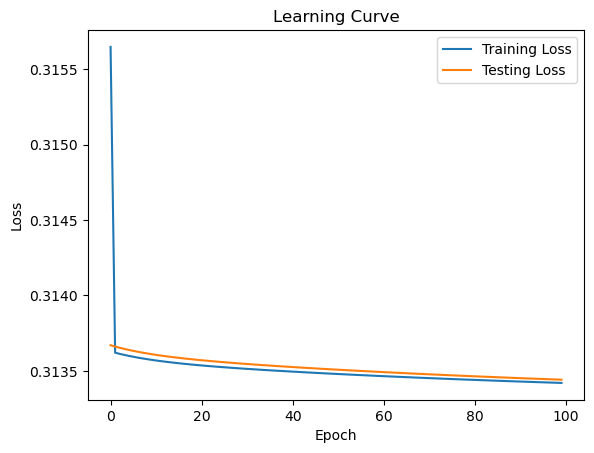

In [27]:
# Plot the learning curve
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [28]:
# Evaluate the model
model.eval()
with torch.no_grad():
    pred = model(data)

In [29]:
# Accuracy calculation
correct = pred.argmax(dim=1).eq(data.y).sum().item()
accuracy = correct / data.y.shape[0]
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8021


In [105]:
import torch

# Function to predict using the trained model
def predict(model, data, device):
    model.eval()
    with torch.no_grad():
        data = data.to(device)
        out = model(data)
    return out

# Use GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained GCN model
gcn_model = GCN(input_dim=x.size(-1), hidden_dim=16, output_dim=2)
gcn_model.load_state_dict(torch.load('gcn_model.pt'))
gcn_model = gcn_model.to(device)

# Load the trained GraphSAGE model
graphsage_model = GraphSAGE(input_dim=x.size(-1), hidden_dim=16, output_dim=2)
graphsage_model.load_state_dict(torch.load('graphsage_model.pt'))
graphsage_model = graphsage_model.to(device)

# Load the data
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)

# Predict using GCN
def predict_gcn(job_description, skills_required):
    # Preprocess job description
    job_desc = preprocess_text(job_description)
    # Tokenize and pad the text data
    seq = tokenizer.texts_to_sequences([job_desc])
    X = pad_sequences(seq, maxlen=max_length)
    # Load pre-trained GloVe embeddings
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    # Compute the mean GloVe vector for the job description
    job_desc_vector = np.mean([embedding_matrix[i] for i in X[0] if i < num_words], axis=0)
    job_desc_vector = torch.FloatTensor(job_desc_vector).to(device)
    
    # Preprocess skills required
    seq = tokenizer.texts_to_sequences([skills_required])
    X = pad_sequences(seq, maxlen=max_length)
    # Load pre-trained GloVe embeddings
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    # Compute the mean GloVe vector for the skills required
    skills_required_vector = np.mean([embedding_matrix[i] for i in X[0] if i < num_words], axis=0)
    skills_required_vector = torch.FloatTensor(skills_required_vector).to(device)

    # Construct the data for prediction
    data = Data(x=torch.stack([job_desc_vector, skills_required_vector]), 
                edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)
    
    # Predict
    pred = predict(gcn_model, data, device)
    return pred.argmax(dim=1).item()

# Predict using GraphSAGE
def predict_graphsage(job_description, skills_required):
    # Preprocess job description
    job_desc = preprocess_text(job_description)
    # Tokenize and pad the text data
    seq = tokenizer.texts_to_sequences([job_desc])
    X = pad_sequences(seq, maxlen=max_length)
    # Load pre-trained GloVe embeddings
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    # Compute the mean GloVe vector for the job description
    job_desc_vector = np.mean([embedding_matrix[i] for i in X[0] if i < num_words], axis=0)
    job_desc_vector = torch.FloatTensor(job_desc_vector).to(device)
    
    # Preprocess skills required
    seq = tokenizer.texts_to_sequences([skills_required])
    X = pad_sequences(seq, maxlen=max_length)
    # Load pre-trained GloVe embeddings
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    # Compute the mean GloVe vector for the skills required
    skills_required_vector = np.mean([embedding_matrix[i] for i in X[0] if i < num_words], axis=0)
    skills_required_vector = torch.FloatTensor(skills_required_vector).to(device)

    # Construct the data for prediction
    data = Data(x=torch.stack([job_desc_vector, skills_required_vector]), 
                edge_index=edge_index, y=y, train_mask=train_mask, test_mask=test_mask)
    
    # Predict
    pred = predict(graphsage_model, data, device)
    return pred.argmax(dim=1).item()

# Example usage
job_description = input("Enter job description: ")
skills_required = input("Enter required skills: ")

gcn_prediction = predict_gcn(job_description, skills_required)
graphsage_prediction = predict_graphsage(job_description, skills_required)

print("GCN Model Prediction:", gcn_prediction)
print("GraphSAGE Model Prediction:", graphsage_prediction)


FileNotFoundError: [Errno 2] No such file or directory: 'gcn_model.pt'